**BADM 557 Final Project - An Analysis of Data Scientists' Salary in 2023**
---

*Data Source*:
https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 

---
**Team Members**:
- Yun-shan Chung
- Hsin-Chuan Chen
- Gege Yao
- En Zhi
- Yueying (Celeste) Huang 

---
**Table of Content**

- [Data Importing and Wrangling](#data-importing--wrangling)
- [Exploratory Data Analysis](#exploratory-data-analysis)
    - [Summary Statistics for Numeric Variables](#summary-statistics-for-numeric-variables)
    - [Summary Statistics for Non-Numeric Variables](#summary-statistics-for-non-numeric-variables)
- [Modelling](#modelling)
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.3f}'.format

# Data Importing & Wrangling

---

In [3]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
job_count = df['job_title'].value_counts()
title_count_10 = job_count[job_count > 10]
title_count_10

job_title
Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Data Science Manager                          58
Applied Scientist                             58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Develop

In [5]:
# Normalize spaces and case
df['job_title'] = df['job_title'].str.strip()

In [6]:
# Replace rows containing "data analyst" with "Data Analyst"
df['job_title'] = np.where(
    df['job_title'].str.contains('data analyst', case=False, na=False),
    'Data Analyst',
    df['job_title']
)

# Replace rows containing "data engineer" with "Data Engineer"
df['job_title'] = np.where(
    df['job_title'].str.contains('data engineer', case=False, na=False),
    'Data Engineer',
    df['job_title']
)

# Replace rows containing "data scientist" with "Data Scientist"
df['job_title'] = np.where(
    df['job_title'].str.contains('data scientist', case=False, na=False),
    'Data Scientist',
    df['job_title']
)

# Replace rows containing "manager" with "Data Manager"
df['job_title'] = np.where(
    df['job_title'].str.contains('manager', case=False, na=False),
    'Data Manager',
    df['job_title']
)
# Replace rows containing 'ML Engineer' or 'Machine Learning Engineer' with 'Machine Learning Engineer'
df['job_title'] = np.where(
    df['job_title'].str.contains(r'\b(ML Engineer|Machine Learning Engineer|Machine Learning Infrastructure Engineer)\b', case=False, na=False),
    'Machine Learning Engineer',
    df['job_title']
)
# Replace rows containing 'ML Scientist' or 'Machine Learning Scientist' with 'Machine Learning Scientist'
df['job_title'] = np.where(
    df['job_title'].str.contains(r'\b(ML Scientist|Machine Learning Scientist)\b', case=False, na=False),
    'Machine Learning Scientist',
    df['job_title']
)
# <30 to "others"
job_count = df['job_title'].value_counts()
title_count_30 = job_count[job_count < 30].index
df['job_title'] = df['job_title'].replace(title_count_30, 'Others')

In [7]:
job_count = df['job_title'].value_counts()
job_count

job_title
Data Engineer                 1067
Data Scientist                 871
Data Analyst                   662
Machine Learning Engineer      340
Others                         283
Data Manager                   113
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Applied Scientist               58
Machine Learning Scientist      38
Research Engineer               37
Name: count, dtype: int64

In [8]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Data Analysis

---

In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Summary Statistics for Numeric Variables

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.000,2022.374,0.691,2020.000,2022.000,2022.000,2023.000,2023.000
salary,3755.000,190695.572,671676.501,6000.000,100000.000,138000.000,180000.000,30400000.000
salary_in_usd,3755.000,137570.390,63055.625,5132.000,95000.000,135000.000,175000.000,450000.000
remote_ratio,3755.000,46.272,48.589,0.000,0.000,0.000,100.000,100.000


## Summary Statistics for Non-Numeric Variables

In [11]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,12,Data Engineer,1067
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


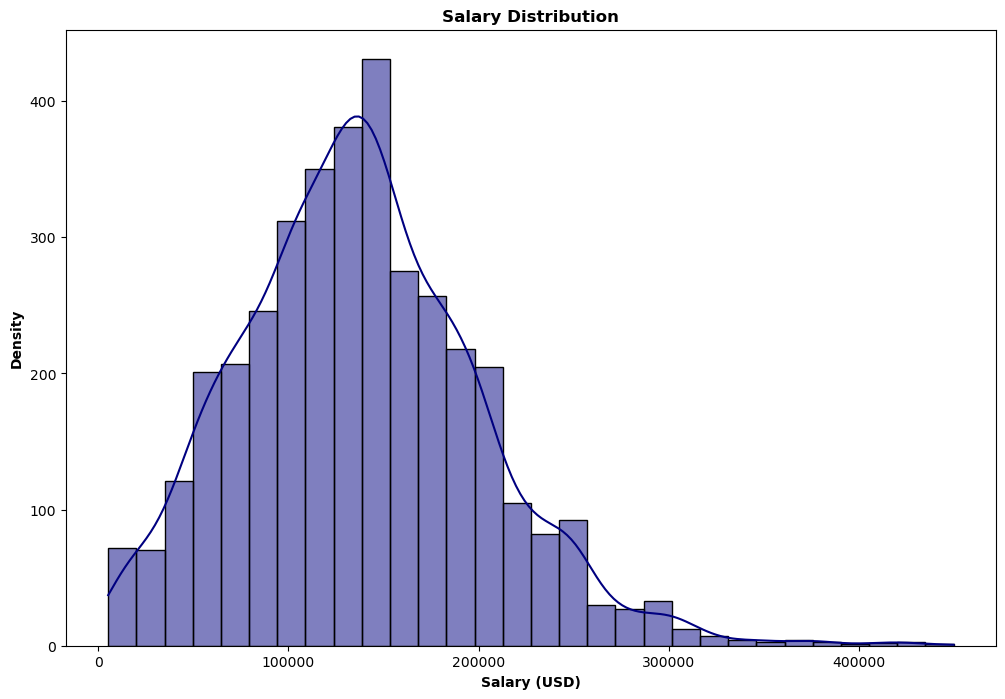

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(df, x='salary_in_usd', bins=30, kde=True, color='navy')
plt.xlabel('Salary (USD)', fontweight='bold')
plt.ylabel('Density', fontweight='bold')
plt.title('Salary Distribution', fontweight='bold')

plt.show()

In [13]:
df["job_title"].value_counts()[:6]

job_title
Data Engineer                1067
Data Scientist                871
Data Analyst                  662
Machine Learning Engineer     340
Others                        283
Data Manager                  113
Name: count, dtype: int64

# Modelling
---

In this part, we're analyzing and predicting the salary for data scientists.

We will conduct a predictive analysis of salary trends and their potential future trajectory. To enhance the regression model's predictive performance, we will employ **K-Means Clustering** and **Random Forest** for feature engineering respectively, followed by **Support Vector Machine (SVM) regression** to analyze and forecast salary trends

That is, for prediction, we use the following models to evaluate our prediction power:


- [K-Means Method](#k-means---feature-clustering)
    - [K-Means Clustering](#k-means-clustering)
    - [K-Means-SVM](#k-means-svm-regression)
- [Random Forest Method](#random-forest---feature-importance)
    - [Random Forest Importance Selection](#random-forest-scoring)
    - [Random Forest-SVM](#random-forest-svm-regression)
- [SVM](#single-svm)
---

  


First, we need to select features for predicing. That is, we need to exclude `salary` and `salary_currency` since we're only interested in salaries in USD. We also need to exclude `salary_in_usd` because this is the target variable we're predicting.

### Predictor Preparing

Notice in the EDA part that there're several outliers, and the distribution is skewed, which may affect our predictions:

1. For **outliers**, we set a *threshold* to exclude those data;

2. For **skewed distribution**, we use a *logarithmic transformation* to transform our target variable.

In [125]:
outliers = df['salary_in_usd'].quantile(.95)
df = df[df['salary_in_usd'] < outliers]

In [126]:
df['salary_in_usd_log'] = np.log1p(df['salary_in_usd'])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_in_usd_log
0,2023,SE,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L,11.360
1,2023,MI,CT,Machine Learning Engineer,30000,USD,30000,US,100,US,S,10.309
2,2023,MI,CT,Machine Learning Engineer,25500,USD,25500,US,100,US,S,10.146
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,12.073
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,11.695


### Feature Preprocessing

First, we need to select features for predicing. That is, we need to exclude `salary` and `salary_currency` since we're only interested in salaries in USD. We also need to exclude `salary_in_usd` because this is the target variable we're predicting.

In [127]:
df_feature = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd','salary_in_usd_log'])
df_feature

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,ES,100,ES,L
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S
3,2023,SE,FT,Data Scientist,CA,100,CA,M
4,2023,SE,FT,Data Scientist,CA,100,CA,M
...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Others,US,100,US,L
3751,2021,MI,FT,Data Scientist,US,100,US,L
3752,2020,EN,FT,Data Scientist,US,100,US,S
3753,2020,EN,CT,Data Analyst,US,100,US,L


#### Additional Features

In this part, we add an additional feature called `new_work_own_country` to check if employees are working in the same country as their nationality. In this way, we expect introducing new feature can improve our predictive performance

In [128]:
df_feature['work_own_country'] = df_feature['employee_residence'] == df_feature['company_location']
df_feature['work_own_country'] = df_feature['work_own_country'].map({True: 'Yes', False: 'No'})
df_feature.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,work_own_country
0,2023,SE,FT,Data Scientist,ES,100,ES,L,Yes
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,Yes
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,Yes
3,2023,SE,FT,Data Scientist,CA,100,CA,M,Yes
4,2023,SE,FT,Data Scientist,CA,100,CA,M,Yes


Columns like `experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, and `company_size` are categorical and therefore need to be encoded into numerical values for feature selection:

#### Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
selected_columns = df_feature.columns
encoder = LabelEncoder()

for col in selected_columns:
    df_feature[col + '_encoded'] = encoder.fit_transform(df_feature[col])

df_feature.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,work_own_country,work_year_encoded,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,remote_ratio_encoded,company_location_encoded,company_size_encoded,work_own_country_encoded
0,2023,SE,FT,Data Scientist,ES,100,ES,L,Yes,3,3,2,6,26,2,25,0,1
1,2023,MI,CT,Machine Learning Engineer,US,100,US,S,Yes,3,2,0,7,74,2,70,2,1
2,2023,MI,CT,Machine Learning Engineer,US,100,US,S,Yes,3,2,0,7,74,2,70,2,1
3,2023,SE,FT,Data Scientist,CA,100,CA,M,Yes,3,3,2,6,11,2,12,1,1
4,2023,SE,FT,Data Scientist,CA,100,CA,M,Yes,3,3,2,6,11,2,12,1,1


In [131]:
encoded_features = [
    'work_year_encoded',
    'experience_level_encoded', 
    'employment_type_encoded', 
    'job_title_encoded',
    'employee_residence_encoded',
    'remote_ratio',
    'company_location_encoded',
    'work_own_country_encoded',
    'company_size_encoded'
]

## K-Means - Feature Clustering

### K-Means Clustering
---

In [132]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

To avoid scaling problem, we use MinMax method to scale the data

In [133]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_feature[encoded_features])

We calculate *Silhouette Scores* for optimal K values:

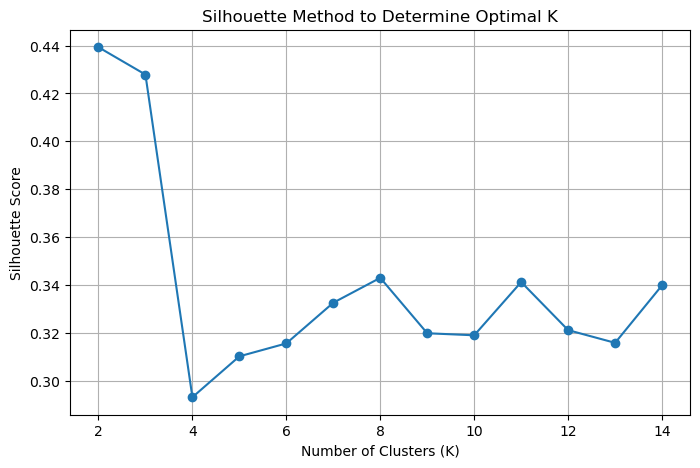

In [134]:
K_range = range(1, 15)
silhouette_scores = []

for k in K_range:  # K_range defined above
    if k > 1:  # Silhouette score is not defined for k=1
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_cluster_scaled)
        score = silhouette_score(X_cluster_scaled, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range[1:], silhouette_scores, marker='o')  # Start from k=2
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Determine Optimal K')
plt.grid()
plt.show()

Here we can find that when `K = 2`, Silhouette Method can get the highest score within the range we defined, which could be the optimial number of clusters.

In [135]:
kmeans = KMeans(n_clusters=2, random_state=557)
df_feature['salary_cluster'] = kmeans.fit_predict(X_scaled)

### K-Means-SVM Regression

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

After we have `salary_cluster` as our new extra feature, we can put it into regression to support our outcome

In [ ]:
KSVM_features = [
   'work_year_encoded',
    'experience_level_encoded', 
    'employment_type_encoded', 
    'job_title_encoded',
    'employee_residence_encoded',
    'remote_ratio',
    'company_location_encoded',
    'company_size_encoded',
    'work_own_country_encoded',
    'salary_cluster'  # feature generate from k-means clustering
]
X_KSVM = X_scaled[KSVM_features]
y_KSVM = df['salary_in_usd_log']

As convension, we need to split our dataset into train-test splits:

In [138]:
X_train_KSVM, X_test_KSVM, y_train_KSVM, y_test_KSVM = train_test_split(X_KSVM, y_KSVM, test_size=0.2, random_state=557)

Again, to avoid scaling issue, we standardized the data:

In [139]:
scaler_svr = StandardScaler()
X_train_scaled_KSVM = scaler_svr.fit_transform(X_train_KSVM)
X_test_scaled_KSVM = scaler_svr.transform(X_test_KSVM)

We use **Grid Search** method to find the optimal hyperparameter:

 `C` - Different regularization strengths

`epsilon`  - Different margins of tolerance

`gamma` - Different kernel coefficients

In [ ]:
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'gamma': ['scale', 0.1, 1]
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled_KSVM, y_train_KSVM)

print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}


In [141]:
ksvr = SVR(kernel='rbf', C=1, epsilon=0.1) 
ksvr.fit(X_train_scaled_KSVM, y_train_KSVM)

SVR(C=1)

In [142]:
y_pred_KSVM = ksvr.predict(X_test_scaled_KSVM)

In [143]:
rmse_KSVM = mean_squared_error(y_test_KSVM, y_pred_KSVM, squared=False)
r2_KSVM = r2_score(y_test_KSVM, y_pred_KSVM)  # R-squared score

print(f"RMSE: {rmse_KSVM:.3f}")
print(f"R²: {r2_KSVM:.3f}")

RMSE: 0.403
R²: 0.505


## Random Forest - Feature Importance
---

In this part, Random forest is used to rank the importance of features and only keep the features with high importance.

### Random Forest Scoring

In [144]:
from sklearn.ensemble import RandomForestRegressor

In [151]:
X_rf = X_scaled # df_features after encoded
y_rf = df['salary_in_usd_log']

In [152]:
original_feature_names = encoded_features
# since X_rf is a NumPy array, we need to transform it back to DataFrame
X_rf = pd.DataFrame(X_rf, columns=original_feature_names)

In [153]:
rf = RandomForestRegressor()
rf.fit(X_rf, y_rf)

feature_importances = pd.DataFrame({'Feature': X_rf.columns, 'Importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select features with highest importance
rf_features = feature_importances.head(6)['Feature']
X_selected = X_rf[rf_features]

In [154]:
X_selected.columns

Index(['employee_residence_encoded', 'experience_level_encoded',
       'job_title_encoded', 'company_location_encoded', 'work_year_encoded',
       'remote_ratio'],
      dtype='object')

### Random Forest-SVM Regression

In [ ]:
X_train_rfsvm, X_test_rfsvm, y_train_rfsvm, y_test_rfsvm = train_test_split(X_selected, y_rf, test_size=0.2, random_state=557)

In [ ]:
scaler = MinMaxScaler()
X_train_rfsvm_scaled = scaler.fit_transform(X_train_rfsvm)
X_test_rfsvm_scaled = scaler.transform(X_test_rfsvm)

In [ ]:
grid_search_rf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_rfsvm_scaled, y_train_rfsvm)

# Print the best parameters
print(f"Best Parameters: {grid_search_rf.best_params_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}


In [ ]:
rfsvr = SVR(kernel='rbf', C=1, epsilon=0.1)

# Train the SVM model
rfsvr.fit(X_train_rfsvm_scaled, y_train_rfsvm)

SVR(C=1)

In [ ]:
y_pred_rfsvm = rfsvr.predict(X_test_rfsvm_scaled)

In [ ]:
rmse_rfsvm = mean_squared_error(y_test_rfsvm, y_pred_rfsvm, squared=False)
r2_rfsvm = r2_score(y_test_rfsvm, y_pred_rfsvm)

print(f"RMSE: {rmse_rfsvm:.3f}")
print(f"R²: {r2_rfsvm:.3f}")

RMSE: 0.446
R²: 0.433


## Single SVM

One may want to know if K-means or Random Forest could really improve our prediction power, so we use soley SVM Regression here for comparison:

In [ ]:
X = X_scaled # df_features after encoded
y = df['salary_in_usd_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=557)

In [ ]:
scaler_svr = MinMaxScaler()
X_train_scaled = scaler_svr.fit_transform(X_train)
X_test_scaled = scaler_svr.transform(X_test)

In [ ]:
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'C': 1, 'epsilon': 0.1, 'gamma': 'scale'}


In [ ]:
svr = SVR(kernel='rbf', C=1, epsilon=0.1) 
svr.fit(X_train_scaled, y_train)

SVR(C=1)

In [ ]:
y_pred = svr.predict(X_test_scaled)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 0.437
R²: 0.456


# Evaluation
---

In [156]:
evaluation = pd.DataFrame({
    'model':['SVM','KMeans-SVM','RF-SVM'],
    'RMSE': [rmse,rmse_KSVM,rmse_rfsvm],
    'R-square':[r2,r2_KSVM,r2_rfsvm]
})

In [157]:
evaluation.set_index('model', inplace=True)
evaluation

,RMSE,R-square
model,,
SVM,0.437,0.456
KMeans-SVM,0.403,0.505
RF-SVM,0.446,0.433


## Visualization for Prediction Result

ValueError: x and y must be the same size

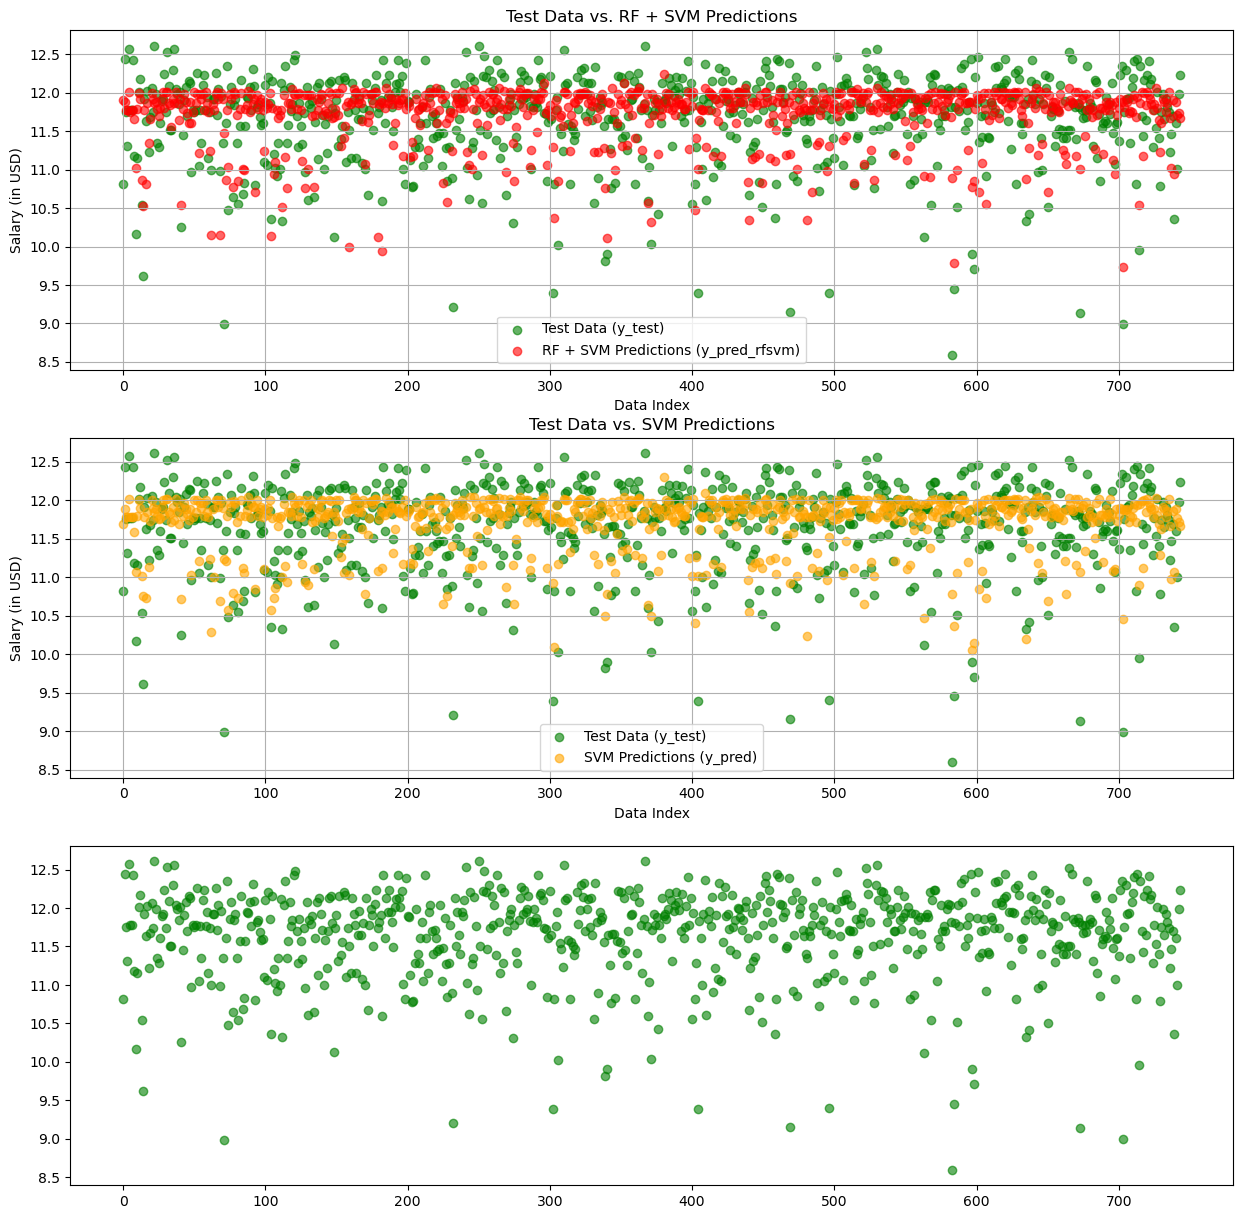

In [ ]:
# Example x-axis indices for test data
x_test_index = np.arange(len(y_test_rfsvm))

# Create subplots for three comparisons
plt.figure(figsize=(15, 15))

# Plot 1: Test Data vs. RF + SVM Predictions
plt.subplot(3, 1, 1)
plt.scatter(x_test_index, y_test_rfsvm, label='Test Data (y_test)', color='green', alpha=0.6)
plt.scatter(x_test_index, y_pred_rfsvm, label='RF + SVM Predictions (y_pred_rfsvm)', color='red', alpha=0.6)
plt.xlabel('Data Index')
plt.ylabel('Salary (in USD)')
plt.title('Test Data vs. RF + SVM Predictions')
plt.legend()
plt.grid()

# Plot 2: Test Data vs. SVM Predictions
plt.subplot(3, 1, 2)
plt.scatter(x_test_index, y_test_rfsvm, label='Test Data (y_test)', color='green', alpha=0.6)
plt.scatter(x_test_index, y_pred, label='SVM Predictions (y_pred)', color='orange', alpha=0.6)
plt.xlabel('Data Index')
plt.ylabel('Salary (in USD)')
plt.title('Test Data vs. SVM Predictions')
plt.legend()
plt.grid()

# Plot 3: Test Data vs. KMeans + SVM Predictions
plt.subplot(3, 1, 3)
plt.scatter(x_test_index, y_test_rfsvm, label='Test Data (y_test)', color='green', alpha=0.6)
plt.scatter(x_test_index, y_pred_KSVM, label='KMeans + SVM Predictions (y_pred_KSVM)', color='purple', alpha=0.6)
plt.xlabel('Data Index')
plt.ylabel('Salary (in USD)')
plt.title('Test Data vs. KMeans + SVM Predictions')
plt.legend()
plt.grid()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Appendix
---

## Clusters Visualization

You may wonder how `K` splits our dataset:

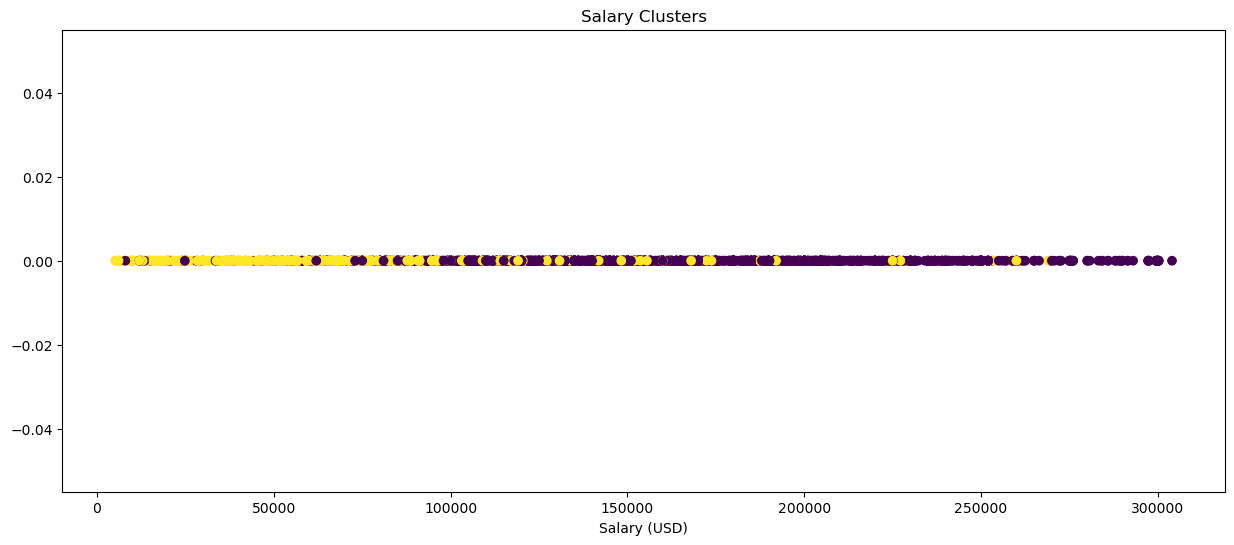

In [ ]:
X = df[['salary_in_usd']].values
plt.figure(figsize=(15,6))
plt.scatter(X, [0]*len(X), c=df_feature['salary_cluster'], cmap='viridis')
plt.xlabel('Salary (USD)')
plt.title('Salary Clusters')
plt.show()

Although we found that *K-Means-SVM* model performs the best among the three model, the cluster is not clear enough to have distinct boundaries, or say, interpretable groups, this may because of:
1. **Inefficient hyperparameter `K`**. That is, although we use Siloutte House to determine optimal `K`, the `K` we got may not be precise enough for this dataset.

2. **Impropriate Dataset**. The distribution, the type of our dataset is not suitable for the model, or the dataset is not big enough for the model


## Importance Scored Visualization

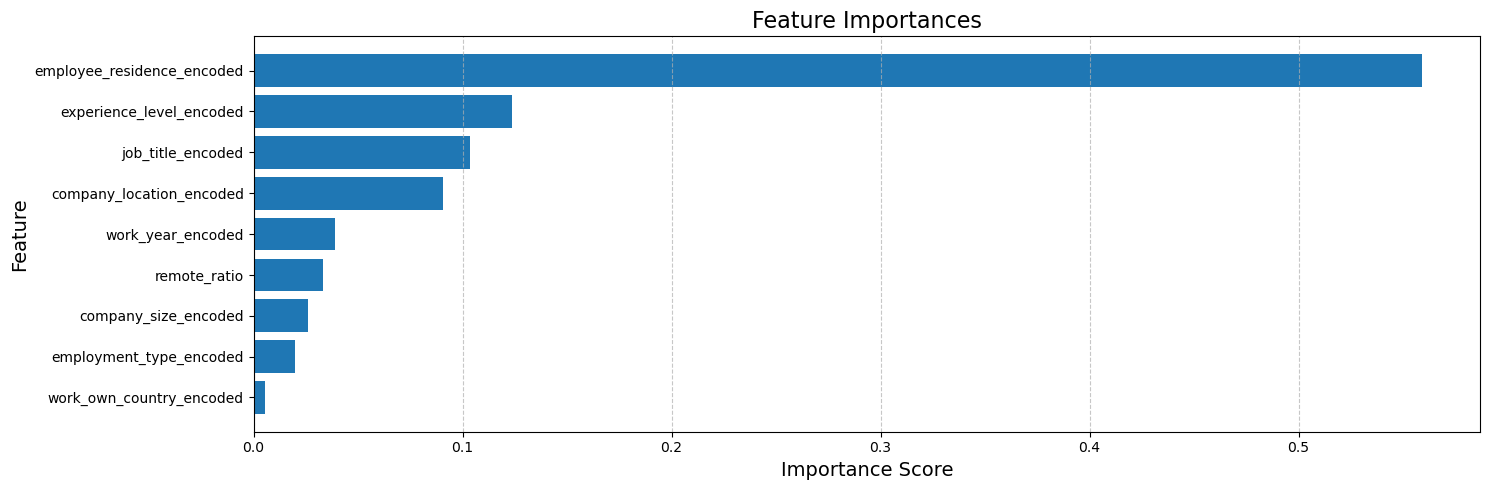

In [155]:
plt.figure(figsize=(15, 5))
plt.barh(feature_importances['Feature'], feature_importances['Importance']) 
plt.gca().invert_yaxis()
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()